In [1]:
print("Shree ganesha")


Shree ganesha


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt

In [15]:
app_var = pd.read_csv("C:\\Loan_Defaulter\\application_data.csv")
prev_app_var= pd.read_csv("C:\\Loan_Defaulter\\previous_application.csv")


In [16]:
app_var.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
app_var.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [18]:
app_var.shape #number of columns and rows

(307511, 122)

In [20]:
msng_calc = pd.DataFrame(app.isnull().sum().sort_values()).reset_index()       #calculate the missing values
msng_calc.rename(columns={'index':'col_name',0:'null_count'},inplace=True)
msng_calc.head()

,col_name,null_count
0,SK_ID_CURR,0
1,HOUR_APPR_PROCESS_START,0
2,REG_REGION_NOT_WORK_REGION,0
3,LIVE_REGION_NOT_WORK_REGION,0
4,REG_CITY_NOT_LIVE_CITY,0


In [22]:
msng_calc['msng_pct'] = msng_calc['null_count']/app.shape[0]*100
# msng_info.to_excel(r"D:\Learnerea\Tables\loan_default_data\missing_info.xlsx",index=False)
msng_calc.head()


,col_name,null_count,msng_pct
0,SK_ID_CURR,0,0.0
1,HOUR_APPR_PROCESS_START,0,0.0
2,REG_REGION_NOT_WORK_REGION,0,0.0
3,LIVE_REGION_NOT_WORK_REGION,0,0.0
4,REG_CITY_NOT_LIVE_CITY,0,0.0


In [23]:
msng_calc['msng_pct'] = msng_calc['null_count']/app.shape[0]*100  #calculate the ratio of missing values 
msng_calc.head()

,col_name,null_count,msng_pct
0,SK_ID_CURR,0,0.0
1,HOUR_APPR_PROCESS_START,0,0.0
2,REG_REGION_NOT_WORK_REGION,0,0.0
3,LIVE_REGION_NOT_WORK_REGION,0,0.0
4,REG_CITY_NOT_LIVE_CITY,0,0.0


In [24]:
msng_calc

,col_name,null_count,msng_pct
0,SK_ID_CURR,0,0.000000
1,HOUR_APPR_PROCESS_START,0,0.000000
2,REG_REGION_NOT_WORK_REGION,0,0.000000
3,LIVE_REGION_NOT_WORK_REGION,0,0.000000
4,REG_CITY_NOT_LIVE_CITY,0,0.000000
...,...,...,...
117,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
118,NONLIVINGAPARTMENTS_MODE,213514,69.432963
119,COMMONAREA_MODE,214865,69.872297
120,COMMONAREA_AVG,214865,69.872297


In [25]:
# import the missing data to excel

In [30]:
msng_calc.to_excel("C:\\Loan_Defaulter\\missing_info.xlsx", index=False)


In [36]:
msng_col = msng_calc[msng_calc['msng_pct']>=45]['col_name'].to_list() # columns with % NULL VALUES
appvar_mesng_removed = app.drop(labels=msng_col,axis=1)
appvar_mesng_removed.shape

(307511, 73)

In [33]:
# 73 columns remaining


In [37]:
appvar_mesng_removed.head

<bound method NDFrame.head of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0          

In [39]:
flagcolcount = []

for col in appvar_mesng_removed.columns:
    if col.startswith("FLAG_"):
        flagcolcount.append(col)
        
len(flagcolcount)

28

In [40]:
# there 28 such columns

In [42]:
flagtargetgt_col =appvar_mesng_removed[flagcolcount+['TARGET']]
flagtargetgt_col.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
flagtgtcol = appvar_mesng_removed[flagcolcount+['TARGET']]
flagtgtcol.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,N,N,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
plt.figure(figsize=(20,25))

<Figure size 2000x2500 with 0 Axes>

<Figure size 2000x2500 with 0 Axes>

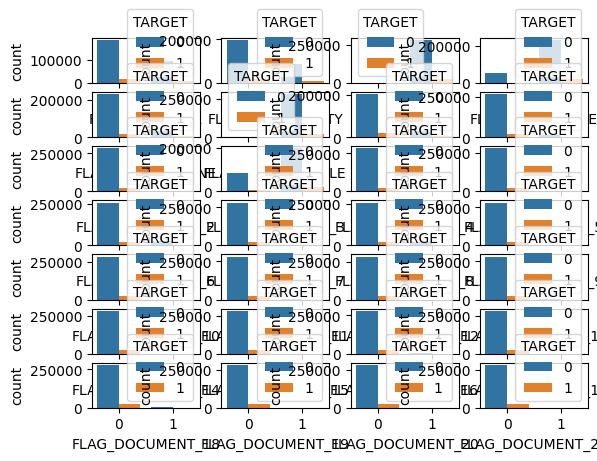

In [75]:
for i, col in enumerate(flagcolcount):
    plt.subplot(7,4,i+1)
    sns.countplot(data=flagtgtcol,x=col,hue='TARGET')

<Axes: xlabel='FLAG_DOCUMENT_19', ylabel='count'>

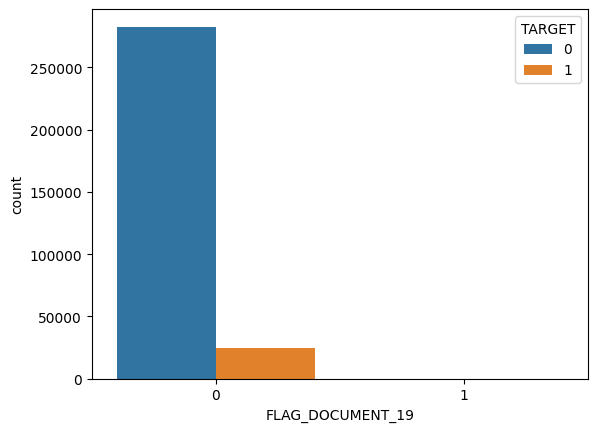

In [76]:
sns.countplot(data=flagtgtcol,x="FLAG_DOCUMENT_19",hue='TARGET')

In [67]:
#those who have not submitted document 19 are non defaulters target=0 here

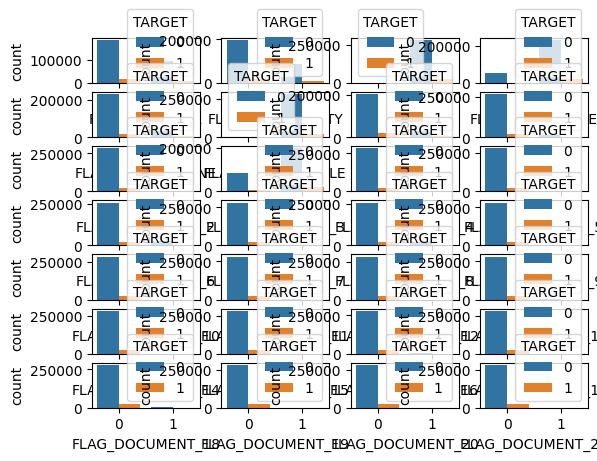

In [72]:
for i, col in enumerate(flagcolcount):
    plt.subplot(7,4,i+1)
    sns.countplot(data=flagtgtcol,x=col,hue='TARGET')

In [71]:
plt.figure(figsize=(20,25))

<Figure size 2000x2500 with 0 Axes>

<Figure size 2000x2500 with 0 Axes>

In [77]:
flgcorr = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
     'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
flagcorrdf = appvar_mesng_removed[flgcorr]


In [78]:
flagcorrdf.groupby(['FLAG_OWN_CAR']).size()

FLAG_OWN_CAR
N    202924
Y    104587
dtype: int64

In [79]:
flagcorrdf['FLAG_OWN_CAR'] = flagcorrdf['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
flagcorrdf['FLAG_OWN_REALTY'] = flagcorrdf['FLAG_OWN_REALTY'].replace({'N':0,'Y':1})

C:\Users\riyam\AppData\Local\Temp\ipykernel_59836\2854722233.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flagcorrdf['FLAG_OWN_CAR'] = flagcorrdf['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
C:\Users\riyam\AppData\Local\Temp\ipykernel_59836\2854722233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flagcorrdf['FLAG_OWN_CAR'] = flagcorrdf['FLAG_OWN_CAR'].replace({'N':0,'Y':1})
C:\Users\riyam\AppData\Local\Temp\ipykernel_59836\2854722233.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will b

In [80]:
flagcorrdf.groupby(['FLAG_OWN_CAR']).size()

FLAG_OWN_CAR
0    202924
1    104587
dtype: int64

<Axes: >

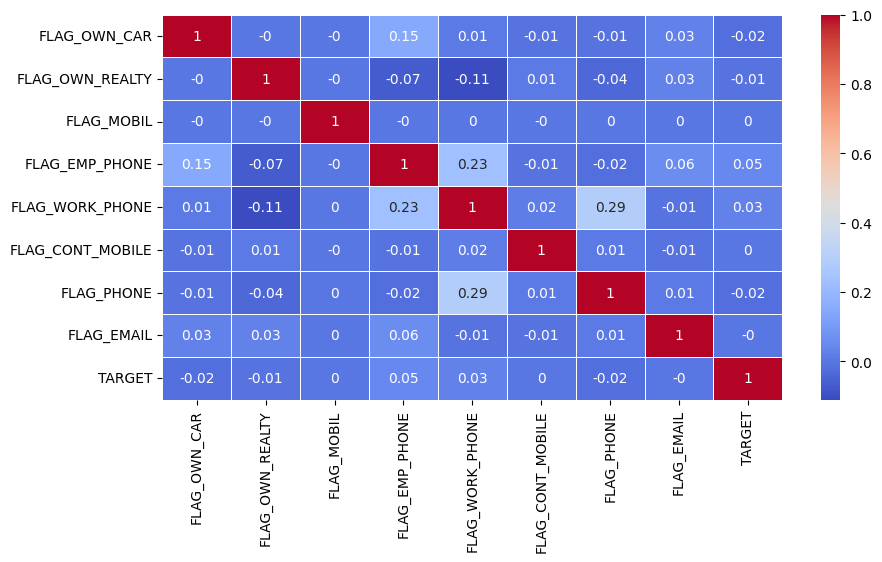

In [82]:
corrdfvar = round(flagcorrdfvar.corr(),2)

plt.figure(figsize=(10,5))
sns.heatmap(corrdf,cmap='coolwarm',linewidths=.5,annot=True)

In [85]:
appflagrmvdvar = appvar_mesng_removed.drop(labels =flagcolcount,axis=1)
appflagrmvdvar.shape

(307511, 45)

<Axes: >

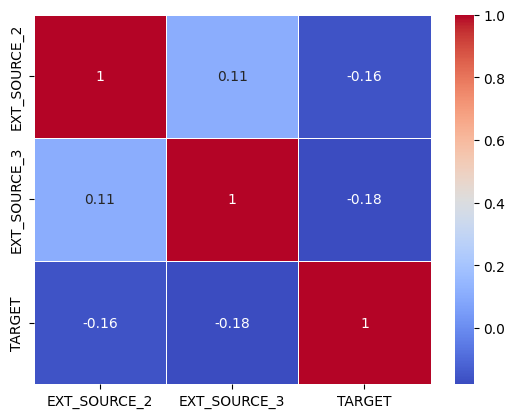

In [87]:
sns.heatmap(data=round(appflagrmvdvar[['EXT_SOURCE_2','EXT_SOURCE_3','TARGET']].corr(),2),cmap='coolwarm',linewidths=.5,annot=True)


In [88]:
# heat map for negative relations

In [89]:
#IMPUTATION

In [91]:
appflagrmvdvar.isnull().sum().sort_values()/appflagrmvdvar.shape[0]

SK_ID_CURR                     0.000000
ORGANIZATION_TYPE              0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
REG_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
HOUR_APPR_PROCESS_START        0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
REGION_RATING_CLIENT           0.000000
DAYS_ID_PUBLISH                0.000000
DAYS_REGISTRATION              0.000000
DAYS_EMPLOYED                  0.000000
DAYS_BIRTH                     0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
NAME_HOUSING_TYPE              0.000000
TARGET                         0.000000
REGION_POPULATION_RELATIVE     0.000000
CODE_GENDER                    0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
NAME_CONTRACT_TYPE             0.000000
NAME_INCOME_TYPE               0.000000


In [93]:
# Take examole of CNT_FAM_MEMBERS    
appflagrmvdvar['CNT_FAM_MEMBERS'] = appflagrmvdvar['CNT_FAM_MEMBERS'].fillna((appflagrmvdvar['CNT_FAM_MEMBERS'].mode()[0]))


In [94]:
appflagrmvdvar['CNT_FAM_MEMBERS'].isnull().sum()


0

In [95]:
# now we have zero missing value for the categorical value


In [96]:
appflagrmvdvar['OCCUPATION_TYPE'] = appflagrmvdvar['OCCUPATION_TYPE'].fillna((appflagrmvdvar['OCCUPATION_TYPE'].mode()[0]))
# app_score_col_rmvd['OCCUPATION_TYPE'].mode()[0]

In [97]:
appflagrmvdvar['OCCUPATION_TYPE'].isnull().sum()

0

In [98]:
appflagrmvdvar['NAME_TYPE_SUITE'] = appflagrmvdvar['NAME_TYPE_SUITE'].fillna((appflagrmvdvar['NAME_TYPE_SUITE'].mode()[0]))


In [99]:
appflagrmvdvar['OCCUPATION_TYPE'].mode()[0]

'Laborers'

In [100]:
appflagrmvdvar['NAME_TYPE_SUITE'] = appflagrmvdvar['NAME_TYPE_SUITE'].fillna((appflagrmvdvar['NAME_TYPE_SUITE'].mode()[0]))

In [101]:
appflagrmvdvar['NAME_TYPE_SUITE'].isnull().sum()

0

In [102]:
appflagrmvdvar['AMT_ANNUITY'] = appflagrmvdvar['AMT_ANNUITY'].fillna((appflagrmvdvar['AMT_ANNUITY'].mean())) # get mean 

In [103]:
appflagrmvdvar['AMT_ANNUITY'].isnull().sum()

0

In [104]:
amtreqcolvar = []

In [106]:
for colvar in appflagrmvdvar.columns:
    if colvar.startswith("AMT_REQ_CREDIT_BUREAU"):
        amtreqcol.append(colvar)

In [110]:
for col in amtreqcol:
    appflagrmvdvar[col] = appflagrmvdvar[col].fillna((appflagrmvdvar[col].median()))

In [111]:
# calculate credit score


In [112]:
amtreqcol

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [113]:
for col in amtreqcol:
    appflagrmvdvar[col] = appflagrmvdvar[col].fillna((appflagrmvdvar[col].median()))


In [114]:

 appflagrmvdvar.isnull().sum().sort_values()


SK_ID_CURR                         0
REGION_RATING_CLIENT               0
AMT_REQ_CREDIT_BUREAU_YEAR         0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
CNT_FAM_MEMBERS                    0
REG_CITY_NOT_LIVE_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
AMT_REQ_CREDIT_BUREAU_HOUR         0
AMT_REQ_CREDIT_BUREAU_DAY          0
AMT_REQ_CREDIT_BUREAU_WEEK         0
AMT_REQ_CREDIT_BUREAU_MON          0
AMT_REQ_CREDIT_BUREAU_QRT          0
REG_CITY_NOT_WORK_CITY             0
OCCUPATION_TYPE                    0
REGION_RATING_CLIENT_W_CITY        0
DAYS_REGISTRATION                  0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
DAYS_ID_PUBLISH                    0
A

In [115]:
appflagrmvdvar['AMT_GOODS_PRICE'] = appflagrmvdvar['AMT_GOODS_PRICE'].fillna((appflagrmvdvar['AMT_GOODS_PRICE'].median()))



In [116]:
# analyse amt good price

In [117]:
appflagrmvdvar['AMT_GOODS_PRICE'].isnull().sum()


0

In [118]:
appflagrmvdvar.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [119]:
dayscolvar = []

for col in appflagrmvdvar.columns:
    if col.startswith("DAYS"):
        dayscolvar.append(col)

dayscolvar

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [121]:
for col in dayscolvar:
    appflagrmvdvar[col] = abs(appflagrmvdvar[col])


In [122]:
for col in dayscolvar:
     appflagrmvdvar[col] = abs( appflagrmvdvar[col])

In [123]:
 appflagrmvdvar.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [124]:
 appflagrmvdvar.nunique().sort_values()

FLAG_DOCUMENT_21                    2
TARGET                              2
NAME_CONTRACT_TYPE                  2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
REG_CITY_NOT_LIVE_CITY              2
LIVE_REGION_NOT_WORK_REGION         2
REG_REGION_NOT_WORK_REGION          2
REG_REGION_NOT_LIVE_REGION          2
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
CODE_GENDER                         3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
NAME_TYPE_SUITE                     7
WEEKDAY_APPR_PROCESS_START          7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_T

In [125]:
 appflagrmvdvar['OBS_30_CNT_SOCIAL_CIRCLE'].unique()

array([  2.,   1.,   0.,   4.,   8.,  10.,  nan,   7.,   3.,   6.,   5.,
        12.,   9.,  13.,  11.,  14.,  22.,  16.,  15.,  17.,  20.,  25.,
        19.,  18.,  21.,  24.,  23.,  28.,  26.,  29.,  27.,  47., 348.,
        30.])

In [127]:

appflagrmvdvar['AMT_GOODS_PRICE'].agg(['min','max','median'])

min         40500.0
max       4050000.0
median     450000.0
Name: AMT_GOODS_PRICE, dtype: float64

<Axes: xlabel='AMT_GOODS_PRICE', ylabel='Density'>

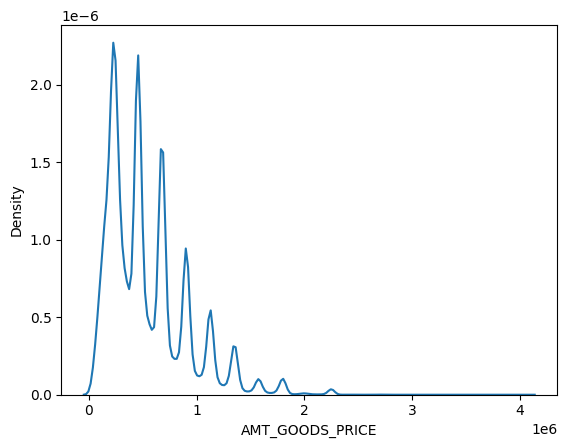

In [129]:
sns.kdeplot(data=appflagrmvdvar,x='AMT_GOODS_PRICE')

<Axes: xlabel='AMT_GOODS_PRICE'>

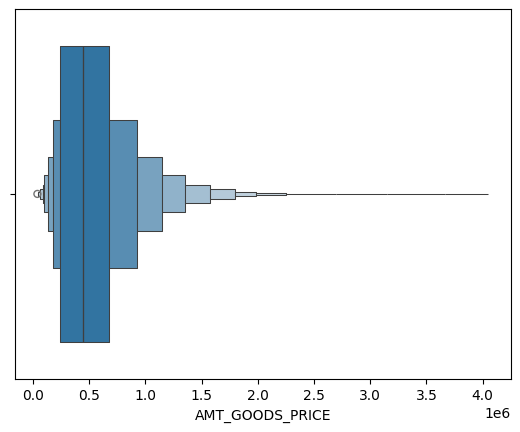

In [131]:
sns.boxenplot(data=appflagrmvdvar,x='AMT_GOODS_PRICE')

In [132]:

appflagrmvdvar['AMT_GOODS_PRICE'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     180000.0
0.20     225000.0
0.30     270000.0
0.40     378000.0
0.50     450000.0
0.60     522000.0
0.70     675000.0
0.80     814500.0
0.90    1093500.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

In [133]:
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,4050000]
ranges = ['0-100K','100k-200K','200K-300K','300K-400K','400K-500K','500K-600K','600K-700K'
          ,'700K-800K','800K-900K','Above 900K']


In [134]:
appflagrmvdvar['AMT_GOODS_PRICE_RANGE'] = pd.cut(appflagrmvdvar['AMT_GOODS_PRICE'],bins,labels=ranges)


In [135]:
appflagrmvdvar.groupby(['AMT_GOODS_PRICE_RANGE']).size()

C:\Users\riyam\AppData\Local\Temp\ipykernel_59836\3083060469.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  appflagrmvdvar.groupby(['AMT_GOODS_PRICE_RANGE']).size()


AMT_GOODS_PRICE_RANGE
0-100K         8709
100k-200K     32956
200K-300K     62761
300K-400K     21219
400K-500K     57251
500K-600K     13117
600K-700K     40024
700K-800K      8110
800K-900K     21484
Above 900K    41880
dtype: int64

In [136]:
appflagrmvdvar['AMT_INCOME_TOTAL'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])

0.10     81000.0
0.20     99000.0
0.30    112500.0
0.40    135000.0
0.50    147150.0
0.60    162000.0
0.70    180000.0
0.80    225000.0
0.90    270000.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [137]:

appflagrmvdvar['AMT_INCOME_TOTAL'].max()

117000000.0

In [138]:
bins = [0,100000,150000,200000,250000,300000,350000,400000,117000000]
ranges = ['0-100K','100K-150K','150K-200K','200K-250K','250K-300K','300K-350K','350K-400K'
          ,'Above 400K']
#perform binning

In [140]:
appflagrmvdvar['AMT_INCOME_TOTAL_RANGE'] = pd.cut(appflagrmvdvar['AMT_INCOME_TOTAL'],bins,labels=ranges)

In [141]:
appflagrmvdvar.groupby(['AMT_INCOME_TOTAL_RANGE']).size()

C:\Users\riyam\AppData\Local\Temp\ipykernel_59836\2053056239.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  appflagrmvdvar.groupby(['AMT_INCOME_TOTAL_RANGE']).size()


AMT_INCOME_TOTAL_RANGE
0-100K        63698
100K-150K     91591
150K-200K     64307
200K-250K     48137
250K-300K     17039
300K-350K      8874
350K-400K      5802
Above 400K     8063
dtype: int64

In [142]:
appflagrmvdvar['AMT_INCOME_TOTAL_RANGE'].isnull().sum()

0

In [143]:
appflagrmvdvar['AMT_CREDIT'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99])


0.10     180000.0
0.20     254700.0
0.30     306306.0
0.40     432000.0
0.50     513531.0
0.60     604152.0
0.70     755190.0
0.80     900000.0
0.90    1133748.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [144]:
appflagrmvdvar['AMT_CREDIT'].max()

4050000.0

In [146]:
binsvar = [0,200000,400000,600000,800000,900000,1000000,2000000,3000000,4050000]
rangesvar = ['0-200K','200K-400K','400K-600K','600K-800K','800K-900K','900K-1M','1M-2M','2M-3M','Above 3M']

appflagrmvdvar['AMT_CREDIT_RANGE'] = pd.cut(appflagrmvdvar['AMT_CREDIT'],binsvar,labels=rangesvar)


In [147]:
appflagrmvdvar.groupby(['AMT_CREDIT_RANGE']).size()

C:\Users\riyam\AppData\Local\Temp\ipykernel_59836\2278492264.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  appflagrmvdvar.groupby(['AMT_CREDIT_RANGE']).size()


AMT_CREDIT_RANGE
0-200K       36144
200K-400K    81151
400K-600K    66270
600K-800K    43242
800K-900K    21792
900K-1M       8927
1M-2M        47956
2M-3M         1997
Above 3M        32
dtype: int64

In [148]:
appflagrmvdvar['AMT_CREDIT'].isnull().sum()

0

In [150]:
appflagrmvdvar['AMT_ANNUITY'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]) # quantiles

0.10    11074.5
0.20    14701.5
0.30    18189.0
0.40    21870.0
0.50    24903.0
0.60    28062.0
0.70    32004.0
0.80    37516.5
0.90    45954.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

In [151]:
appflagrmvdvar['AMT_ANNUITY'].max()



258025.5

In [154]:
binsvar = [0,2500,5000,10000,15000,20000,25802.5]
rangesvar = ['0-2K','2K-5K','5K-10K','10K-15K','15K-20K','Above 20K']

appflagrmvdvar['AMT_ANNUITY_RANGE'] = pd.cut(appflagrmvdvar['AMT_ANNUITY'],binsvar,labels=rangesvar)



In [155]:
#DATA ANALYSIS

In [156]:
#NON DEFAULTER CASE STUDY

In [157]:
#CATEGORICAL VARIABLE FOR BINNING

In [158]:
appflagrmvdvar.dtypes.value_counts()

float64     20
int64       16
object      10
category     1
category     1
category     1
category     1
Name: count, dtype: int64

In [159]:
#CHECKED DATA TYPES


In [163]:

appflagrmvdvar.dtypes.value_counts()

float64     20
int64       16
object      10
category     1
category     1
category     1
category     1
Name: count, dtype: int64

In [161]:
objvar = appflagrmvdvar.select_dtypes(include=['object']).columns
objvar


Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [162]:
appflagrmvdvar.groupby(['NAME_CONTRACT_TYPE']).size()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
dtype: int64

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

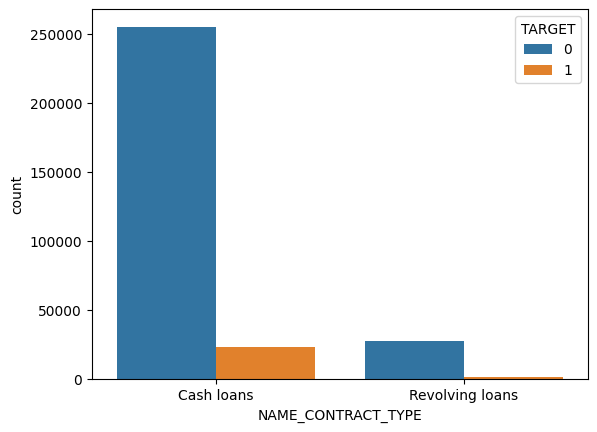

In [164]:
# 27K NON DEFAULTERS CASH LOANS
sns.countplot(data=appflagrmvdvar,x='NAME_CONTRACT_TYPE',hue='TARGET')

In [ ]:
datapct = appflagrmvdvar[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'], as_index=False).mean().sort_values(by='TARGET',ascending=False)

In [166]:
datapct

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.083459
1,Revolving loans,0.054783


In [167]:
datapct['PCT'] = datapct['TARGET']*100


<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

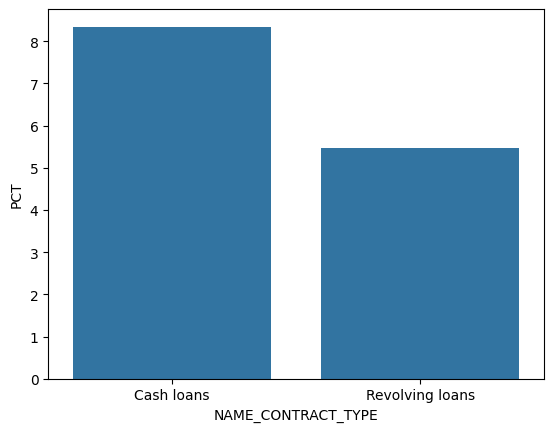

In [168]:
sns.barplot(data=datapct,x='NAME_CONTRACT_TYPE',y='PCT')

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=,x='NAME_CONTRACT_TYPE',hue='TARGET')

plt.subplot(1,2,2)
sns.barplot(data=data_pct,x='NAME_CONTRACT_TYPE',y='PCT')


In [171]:
objvar

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [172]:
plt.figure(figsize=(25,60))

<Figure size 2500x6000 with 0 Axes>

<Figure size 2500x6000 with 0 Axes>

In [173]:
for i, var in enumerate(objvar):

    datapct = appflagrmvdvar[[var,'TARGET']].groupby([var], as_index=False).mean().sort_values(by='TARGET',ascending=False)
    datapct['PCT'] = datapct['TARGET']*100


In [ ]:
# Assuming 'PCT' is a column in your DataFrame
for i, var in enumerate(appflagrmvdvar.columns):
    plt.subplot(10, 2, i + 1)
    sns.barplot(data=appflagrmvdvar, x=var, y='PCT', palette='coolwarm')
    plt.xticks(rotation=90)


In [176]:
appflagrmvdvar['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [177]:
appflagrmvdvar.dtypes.value_counts()

float64     20
int64       16
object      10
category     1
category     1
category     1
category     1
Name: count, dtype: int64

In [182]:
num_var = appflagrmvdvar.select_dtypes(include=['float64','int64']).columns
num_cat_var = appflagrmvdvar.select_dtypes(include=['float64','int64','category']).columns
len(num_var)

36

In [183]:
objvar = appflagrmvdvar.select_dtypes(include=['object']).columns
objvar


Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [184]:
appflagrmvdvar.groupby(['NAME_CONTRACT_TYPE']).size()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
dtype: int64

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

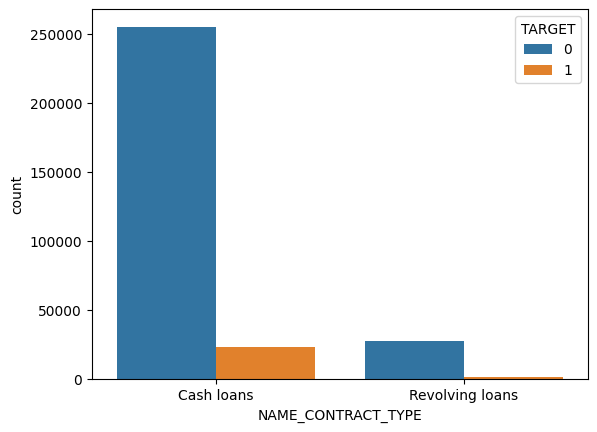

In [185]:

sns.countplot(data=appflagrmvdvar,x='NAME_CONTRACT_TYPE',hue='TARGET')

In [187]:
datapct = appflagrmvdvar[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'], as_index=False).mean().sort_values(by='TARGET',ascending=False)


In [188]:
datapct

,NAME_CONTRACT_TYPE,TARGET
0,Cash loans,0.083459
1,Revolving loans,0.054783


In [189]:
datapct['PCT'] = datapct['TARGET']*100

In [190]:
datapct

,NAME_CONTRACT_TYPE,TARGET,PCT
0,Cash loans,0.083459,8.345913
1,Revolving loans,0.054783,5.478329


<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

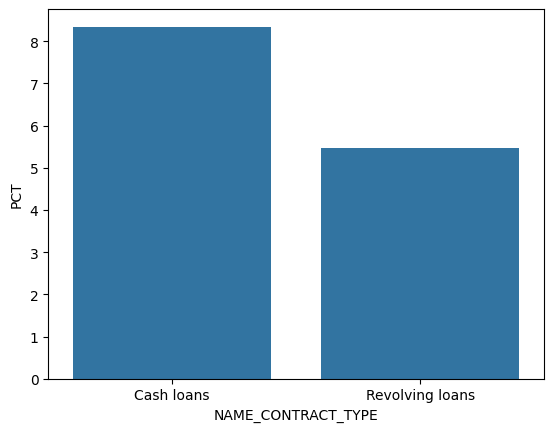

In [191]:
sns.barplot(data=datapct,x='NAME_CONTRACT_TYPE',y='PCT')

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='PCT'>

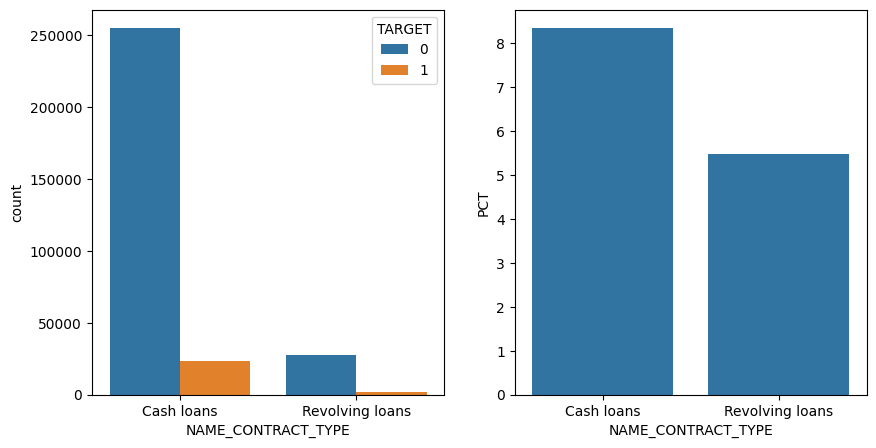

In [192]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=appflagrmvdvar,x='NAME_CONTRACT_TYPE',hue='TARGET')

plt.subplot(1,2,2)
sns.barplot(data=datapct,x='NAME_CONTRACT_TYPE',y='PCT')

In [193]:
objvar

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [194]:
plt.figure(figsize=(25,60))

<Figure size 2500x6000 with 0 Axes>

<Figure size 2500x6000 with 0 Axes>

In [199]:
for i, var in enumerate(objvar):

    datapct = appflagrmvdvar[[var,'TARGET']].groupby([var], as_index=False).mean().sort_values(by='TARGET',ascending=False)
    datapct['PCT'] = datapct['TARGET']*100

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57],
 [Text(0, 0, 'Business Entity Type 3'),
  Text(1, 0, 'School'),
  Text(2, 0, 'Government'),
  Text(3, 0, 'Religion'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'XNA'),
  Text(6, 0, 'Electricity'),
  Text(7, 0, 'Medicine'),
  Text(8, 0, 'Business Entity Type 2'),
  Text(9, 0, 'Self-employed'),
  Text(10, 0, 'Transport: type 2'),
  Text(11, 0, 'Construction'),
  Text(12, 0, 'Housing'),
  Text(13, 0, 'Kindergarten'),
  Text(14, 0, 'Trade: type 7'),
  Text(15, 0, 'Industry: type 11'),
  Text(16, 0, 'Military'),
  Text(17, 0, 'Services'),
  Text(18, 0, 'Security Ministries'),
  Text(19, 0, 'Transport: type 4'),
  Text(20, 0, 'Industry: type 1'),
  Text(21, 0, 'Eme

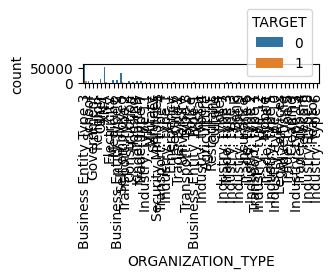

In [202]:
    plt.subplot(10,2,i+i+1)
    plt.subplots_adjust(wspace=0.1,hspace=1)
    sns.countplot(data=appflagrmvdvar,x=var,hue='TARGET')
    plt.xticks(rotation=90)


C:\Users\riyam\AppData\Local\Temp\ipykernel_59836\3335098143.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=datapct,x=var,y='PCT',palette='coolwarm')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57],
 [Text(0, 0, 'Transport: type 3'),
  Text(1, 0, 'Industry: type 13'),
  Text(2, 0, 'Industry: type 8'),
  Text(3, 0, 'Restaurant'),
  Text(4, 0, 'Construction'),
  Text(5, 0, 'Cleaning'),
  Text(6, 0, 'Industry: type 1'),
  Text(7, 0, 'Industry: type 3'),
  Text(8, 0, 'Realtor'),
  Text(9, 0, 'Agriculture'),
  Text(10, 0, 'Trade: type 3'),
  Text(11, 0, 'Self-employed'),
  Text(12, 0, 'Industry: type 4'),
  Text(13, 0, 'Security'),
  Text(14, 0, 'Trade: type 7'),
  Text(15, 0, 'Business Entity Type 3'),
  Text(16, 0, 'Transport: type 4'),
  Text(17, 0, 'Mobile'),
  Text(18, 0, 'Trade: type 1'),
  Text(19, 0, 'Industry: type 11'),
  Text(20, 0, 'Business

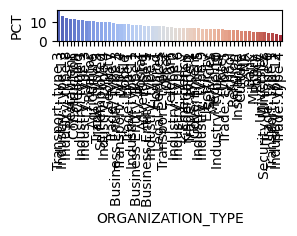

In [203]:
    plt.subplot(10,2,i+i+2)
    sns.barplot(data=datapct,x=var,y='PCT',palette='coolwarm')
    plt.xticks(rotation=90)

In [204]:
appflagrmvdvar['NAME_EDUCATION_TYPE'].unique()


array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [205]:
appflagrmvdvar.dtypes.value_counts()

float64     20
int64       16
object      10
category     1
category     1
category     1
category     1
Name: count, dtype: int64

In [206]:
num_var = appflagrmvdvar.select_dtypes(include=['float64','int64']).columns
num_cat_var = appflagrmvdvar.select_dtypes(include=['float64','int64','category']).columns
len(num_var)

36

In [208]:
num_data = appflagrmvdvar[num_var]
defaulters = num_data[num_data['TARGET']==1]
repayers = num_data[num_data['TARGET']==0]
repayers.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_DOCUMENT_21
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,100008,0,0,99000.0,490495.5,27517.5,454500.0,0.035792,16941,1588,...,0.0,0.0,2536.0,0.0,0.0,0.0,0.0,1.0,1.0,0


In [209]:
defaulters[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL']].corr()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL
SK_ID_CURR,1.000000,-0.005144,-0.010165
CNT_CHILDREN,-0.005144,1.000000,0.004796
AMT_INCOME_TOTAL,-0.010165,0.004796,1.000000


In [211]:
defaulter_corr = defaulters.corr()
defaulter_corr_unstck = defaulter_corr.where(np.triu(np.ones(defaulter_corr.shape),k=1).astype(bool)).unstack().reset_index().rename(columns={'level_0':'var1'
                                                                                                                        ,'level_1':'var2'
                                                                                                                        ,0:'corr'})
defaulter_corr_unstck['corr'] = abs(defaulter_corr_unstck['corr'])
defaulter_corr_unstck.dropna(subset=['corr']).sort_values(by=['corr'],ascending=False).head(10)

,var1,var2,corr
960,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269
220,AMT_GOODS_PRICE,AMT_CREDIT,0.982783
517,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
434,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
997,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994
665,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885
776,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540
221,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295
184,AMT_ANNUITY,AMT_CREDIT,0.752195
332,DAYS_EMPLOYED,DAYS_BIRTH,0.582185


In [212]:
repayers_corr = repayers.corr()
repayers_corr_unstck = repayers_corr.where(np.triu(np.ones(repayers_corr.shape),k=1).astype(bool)).unstack().reset_index().rename(columns={'level_0':'var1'
                                                                                                                        ,'level_1':'var2'
                                                                                                                        ,0:'corr'})
repayers_corr_unstck['corr'] = abs(repayers_corr_unstck['corr'])
repayers_corr_unstck.dropna(subset=['corr']).sort_values(by=['corr'],ascending=False).head(10)

,var1,var2,corr
960,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508
220,AMT_GOODS_PRICE,AMT_CREDIT,0.987022
517,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
434,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
665,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861
997,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859332
776,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381
221,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421
184,AMT_ANNUITY,AMT_CREDIT,0.771297
332,DAYS_EMPLOYED,DAYS_BIRTH,0.626114


In [213]:
num_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_DOCUMENT_21
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [214]:
amt_var = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

<Axes: xlabel='AMT_CREDIT', ylabel='Density'>

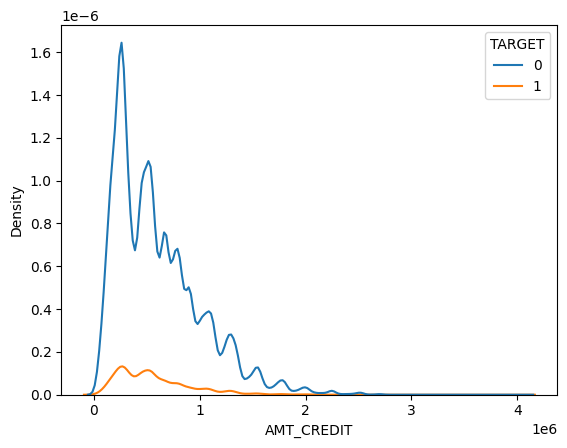

In [215]:
sns.kdeplot(data=num_data,x='AMT_CREDIT',hue='TARGET')


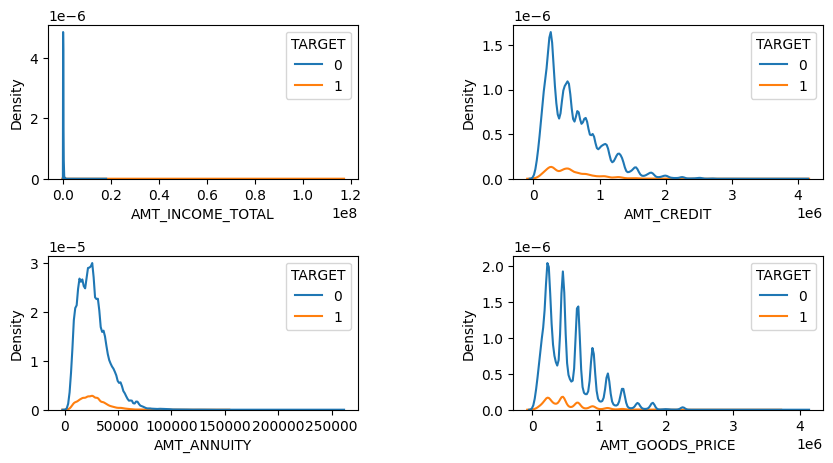

In [216]:
plt.figure(figsize=(10,5))

for i, col in enumerate(amt_var):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=num_data,x=col,hue='TARGET')
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [217]:
num_data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_DOCUMENT_21
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,637,...,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,1188,...,1.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,225,...,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,3039,...,2.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,3038,...,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0


<Axes: xlabel='AMT_CREDIT', ylabel='CNT_CHILDREN'>

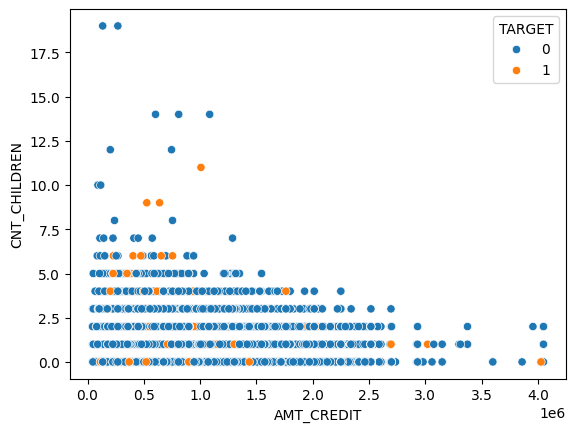

In [218]:
sns.scatterplot(data=num_data,x='AMT_CREDIT',y='CNT_CHILDREN',hue='TARGET')

In [219]:
amt_var = num_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']]

In [ ]:
null_count = pd.DataFrame(prev_app.isnull().sum().sort_values(ascending=False)/prev_app.shape[0]*100).reset_index().rename(columns={'index':'var',
                                                                                                                                   0:'count_pct'})
var_msng_ge_40 = list(null_count[null_count['count_pct']>=40]['var'])
var_msng_ge_40


In [ ]:
nva_cols = var_msng_ge_40+['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
len(nva_cols)

In [ ]:
len(prev_app.columns)

In [224]:
null_count = pd.DataFrame(prev_app.isnull().sum().sort_values(ascending=False)/prev_app.shape[0]*100).reset_index().rename(columns={'index':'var',
                                                                                                                                   0:'count_pct'})
var_msng_ge_40 = list(null_count[null_count['count_pct']>=40]['var'])
var_msng_ge_40

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'NAME_TYPE_SUITE',
 'NFLAG_INSURED_ON_APPROVAL',
 'DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING']

In [225]:
nva_cols = var_msng_ge_40+['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
len(nva_cols)

15

In [226]:
len(prev_app.columns)


37

In [227]:
prev_app_nva_col_rmvd = prev_app.drop(labels=nva_cols,axis=1)

In [228]:
prev_app_nva_col_rmvd = prev_app.drop(labels=nva_cols,axis=1)

In [229]:

prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)/prev_app_nva_col_rmvd.shape[0]*100

AMT_GOODS_PRICE           23.081773
AMT_ANNUITY               22.286665
CNT_PAYMENT               22.286366
PRODUCT_COMBINATION        0.020716
AMT_CREDIT                 0.000060
NAME_GOODS_CATEGORY        0.000000
NAME_YIELD_GROUP           0.000000
NAME_SELLER_INDUSTRY       0.000000
SELLERPLACE_AREA           0.000000
CHANNEL_TYPE               0.000000
NAME_PRODUCT_TYPE          0.000000
NAME_PORTFOLIO             0.000000
SK_ID_PREV                 0.000000
NAME_CLIENT_TYPE           0.000000
SK_ID_CURR                 0.000000
NAME_PAYMENT_TYPE          0.000000
DAYS_DECISION              0.000000
NAME_CONTRACT_STATUS       0.000000
NAME_CASH_LOAN_PURPOSE     0.000000
AMT_APPLICATION            0.000000
NAME_CONTRACT_TYPE         0.000000
CODE_REJECT_REASON         0.000000
dtype: float64

In [230]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].agg(func=['mean','median'])

mean      227847.279283
median    112320.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [231]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MEDIAN'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].median())

In [232]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MEAN'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].mean())

In [233]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE_MODE'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].mode()[0])


In [234]:
gp_cols = ['AMT_GOODS_PRICE','AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE']


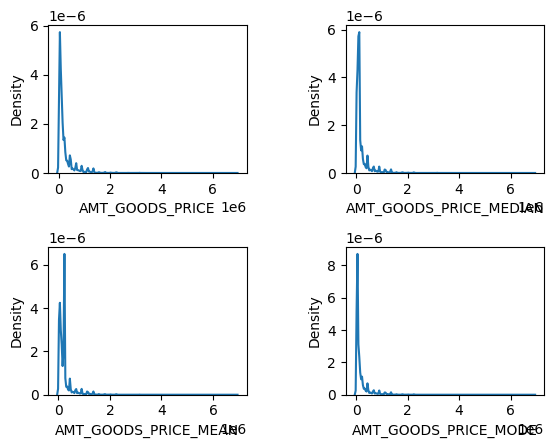

In [236]:
for i, col in enumerate(gp_cols):
    plt.subplot(2,2,i+1)
    sns.kdeplot(data=prev_app_nva_col_rmvd,x=col)
    plt.subplots_adjust(wspace=0.5,hspace=0.5)

In [237]:

plt.figure(figsize=(10,5))


<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [238]:
prev_app_nva_col_rmvd['AMT_GOODS_PRICE'] = prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].fillna(prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].median())

In [239]:

prev_app_nva_col_rmvd['AMT_GOODS_PRICE'].isnull().sum()

0

In [240]:
prev_app_nva_col_rmvd['AMT_ANNUITY'].agg(func=['mean','median','max'])



mean       15955.120659
median     11250.000000
max       418058.145000
Name: AMT_ANNUITY, dtype: float64

In [241]:
prev_app_nva_col_rmvd['AMT_ANNUITY'] = prev_app_nva_col_rmvd['AMT_ANNUITY'].fillna(prev_app_nva_col_rmvd['AMT_ANNUITY'].median())


In [242]:
prev_app_nva_col_rmvd['PRODUCT_COMBINATION'] = prev_app_nva_col_rmvd['PRODUCT_COMBINATION'].fillna(prev_app_nva_col_rmvd['PRODUCT_COMBINATION'].mode()[0])


In [243]:
prev_app_nva_col_rmvd['CNT_PAYMENT'].agg(func=['mean','median','max'])



mean      16.054082
median    12.000000
max       84.000000
Name: CNT_PAYMENT, dtype: float64

In [244]:
prev_app_nva_col_rmvd[prev_app_nva_col_rmvd['CNT_PAYMENT'].isnull()].groupby(['NAME_CONTRACT_STATUS']).size().sort_values(ascending=False)


NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
dtype: int64

In [245]:
prev_app_nva_col_rmvd['CNT_PAYMENT'] = prev_app_nva_col_rmvd['CNT_PAYMENT'].fillna(0)


In [246]:
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)


AMT_CREDIT                1
SK_ID_PREV                0
NAME_GOODS_CATEGORY       0
AMT_GOODS_PRICE_MEAN      0
AMT_GOODS_PRICE_MEDIAN    0
PRODUCT_COMBINATION       0
NAME_YIELD_GROUP          0
CNT_PAYMENT               0
NAME_SELLER_INDUSTRY      0
SELLERPLACE_AREA          0
CHANNEL_TYPE              0
NAME_PRODUCT_TYPE         0
NAME_PORTFOLIO            0
NAME_CLIENT_TYPE          0
SK_ID_CURR                0
CODE_REJECT_REASON        0
NAME_PAYMENT_TYPE         0
DAYS_DECISION             0
NAME_CONTRACT_STATUS      0
NAME_CASH_LOAN_PURPOSE    0
AMT_GOODS_PRICE           0
AMT_APPLICATION           0
AMT_ANNUITY               0
NAME_CONTRACT_TYPE        0
AMT_GOODS_PRICE_MODE      0
dtype: int64

In [247]:
prev_app_nva_col_rmvd = prev_app_nva_col_rmvd.drop(labels=['AMT_GOODS_PRICE_MEDIAN','AMT_GOODS_PRICE_MEAN','AMT_GOODS_PRICE_MODE'],axis=1)


In [248]:
prev_app_nva_col_rmvd.isnull().sum().sort_values(ascending=False)

AMT_CREDIT                1
SK_ID_PREV                0
NAME_CLIENT_TYPE          0
NAME_YIELD_GROUP          0
CNT_PAYMENT               0
NAME_SELLER_INDUSTRY      0
SELLERPLACE_AREA          0
CHANNEL_TYPE              0
NAME_PRODUCT_TYPE         0
NAME_PORTFOLIO            0
NAME_GOODS_CATEGORY       0
CODE_REJECT_REASON        0
SK_ID_CURR                0
NAME_PAYMENT_TYPE         0
DAYS_DECISION             0
NAME_CONTRACT_STATUS      0
NAME_CASH_LOAN_PURPOSE    0
AMT_GOODS_PRICE           0
AMT_APPLICATION           0
AMT_ANNUITY               0
NAME_CONTRACT_TYPE        0
PRODUCT_COMBINATION       0
dtype: int64

In [249]:
len(prev_app_nva_col_rmvd.columns)


22

In [250]:
prev_app_nva_col_rmvd.head()


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,XAP,Approved,-73,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,XNA,Approved,-164,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,XNA,Approved,-301,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,XNA,Approved,-512,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,-781,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [252]:
merged_df = pd.merge(appflagrmvdvar,prev_app_nva_col_rmvd,how='inner',on='SK_ID_CURR')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


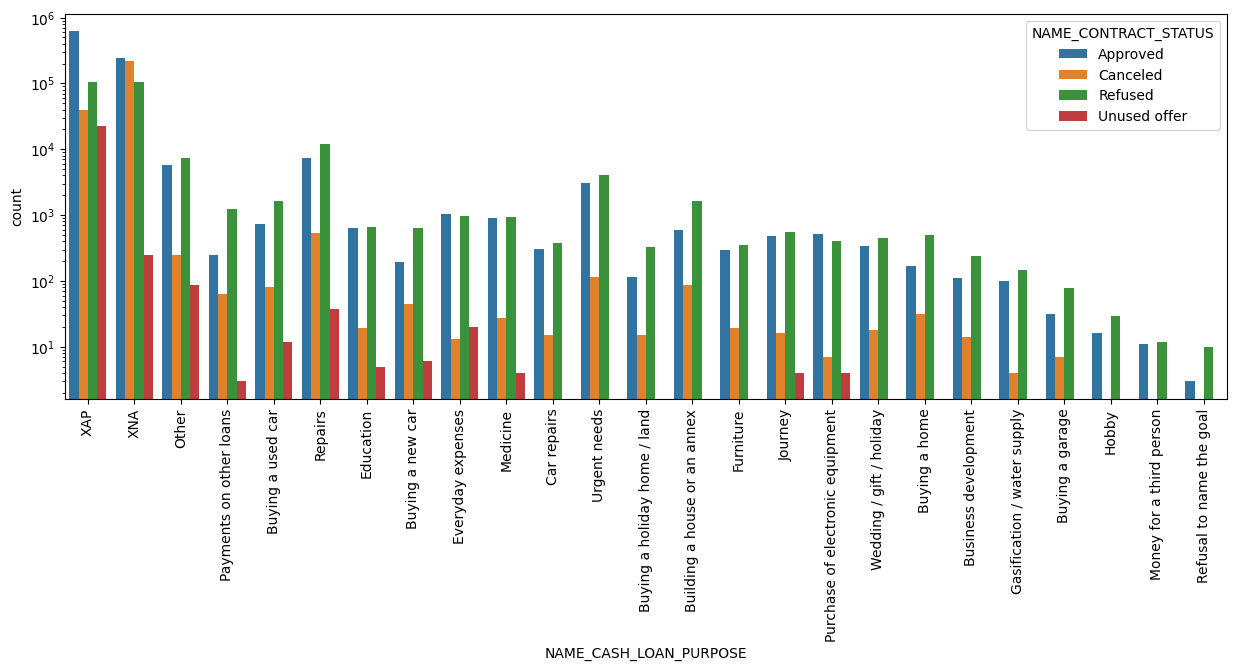

In [253]:
plt.figure(figsize=(15,5))

sns.countplot(data=merged_df,x='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS')
plt.xticks(rotation=90)
plt.yscale('log')


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

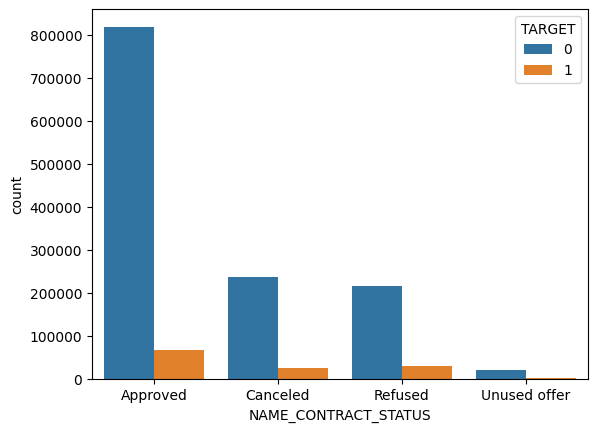

In [254]:
sns.countplot(data=merged_df,x='NAME_CONTRACT_STATUS',hue='TARGET')


In [255]:
merged_agg = merged_df.groupby(['NAME_CONTRACT_STATUS','TARGET']).size().reset_index().rename(columns={0:'counts'})
sum_df  = merged_agg.groupby(['NAME_CONTRACT_STATUS'])['counts'].sum().reset_index()

merged_agg_2 = pd.merge(merged_agg,sum_df,how='left',on='NAME_CONTRACT_STATUS')
merged_agg_2['pct'] = round(merged_agg_2['counts_x']/merged_agg_2['counts_y']*100,2)
merged_agg_2

,NAME_CONTRACT_STATUS,TARGET,counts_x,counts_y,pct
0,Approved,0,818856,886099,92.41
1,Approved,1,67243,886099,7.59
2,Canceled,0,235641,259441,90.83
3,Canceled,1,23800,259441,9.17
4,Refused,0,215952,245390,88.00
5,Refused,1,29438,245390,12.00
6,Unused offer,0,20892,22771,91.75
7,Unused offer,1,1879,22771,8.25


C:\Users\riyam\AppData\Local\Temp\ipykernel_59836\563267390.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=merged_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',ci=None,hue='TARGET')


<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_INCOME_TOTAL'>

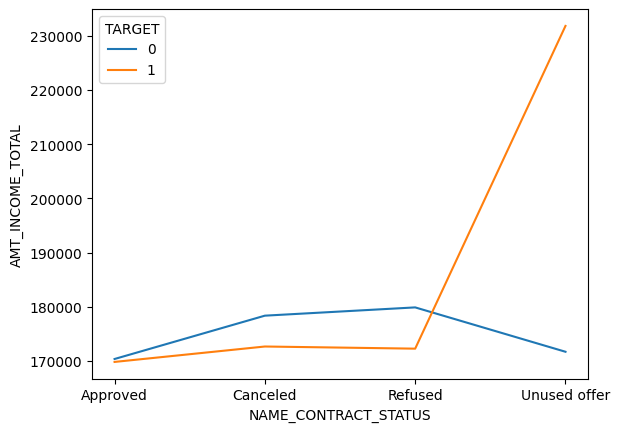

In [256]:
sns.lineplot(data=merged_df,x='NAME_CONTRACT_STATUS',y='AMT_INCOME_TOTAL',ci=None,hue='TARGET')

In [257]:
len(merged_df.columns)


71

In [3]:
#This case study seeks to illustrate the practical application of Exploratory Data Analysis (EDA) within a real-world business context. #In addition to employing established EDA techniques, the study will delve into the realm of risk analytics in the banking and financial services sector. The primary objective is to comprehend how data is harnessed to mitigate the risk of financial losses when extending loans to customers. Through this analysis, we aim to gain valuable insights into the factors influencing lending risk and contribute to informed decision-making processes in the financial industry.
